<a href="https://colab.research.google.com/github/moosenasser/ipynb-samples/blob/main/Linear%20Regression%20with%20Sea%20Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containng both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*



---



The goal of this notebook is using a model to predict sea level based on a given year. Scikit-learn 0.24.2 is utilized to create a single-variable linear regression model.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
yr = 'Year'
sea_lvl = 'CSIRO Adjusted Sea Level'
sea_lvl_csv_path = '/content/sample_data/epa-sea-level.csv'

In [3]:
df = pd.read_csv(sea_lvl_csv_path)

In [4]:
"""Only 'Year' and 'CSIRO Adjusted Sea Level' are
necessary columns for single-variable regression."""
mod_df = df[[yr, sea_lvl]]

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(
    mod_df.Year.values, mod_df[sea_lvl].values, train_size=0.8, random_state=1)

In [6]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
validation_preds = model.predict(x_valid.reshape(-1, 1))
validation_mae = mean_absolute_error(validation_preds, y_valid) 
print("MAE for validation predictions: {:,.3f}".format(validation_mae))

MAE for validation predictions: 0.339


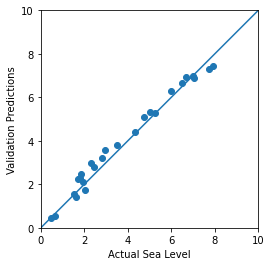

In [8]:
plt.axes(aspect='equal')
plt.scatter(y_valid, validation_preds)
plt.xlabel('Actual Sea Level')
plt.ylabel('Validation Predictions')

limits = [0, 10]
plt.xlim(limits)
plt.ylim(limits)
plt.plot(limits, limits);